<a href="https://colab.research.google.com/github/goelanmol124/30-Days-Of-React/blob/master/AMC_Trilytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/AMC_health_and_safety_data.xlsx - Data.csv')
data = data.replace('?',None)
data = data.replace('? ',None)
data['SUBUNIT_CD'] = data['SUBUNIT_CD'].astype(str)
data['ACCIDENT_DT'] = pd.to_datetime(data['ACCIDENT_DT'])
data['RETURN_TO_WORK_DT'] = pd.to_datetime(data['RETURN_TO_WORK_DT'])
data['INVEST_BEGIN_DT'] = pd.to_datetime(data['INVEST_BEGIN_DT'])
data = data.drop(['INVEST_BEGIN_DT', 'IMMED_NOTIFY','IMMED_NOTIFY_CD','CLOSED_DOC_NO'], axis = 1)

In [ ]:
data.head(3)

,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,...,INJ_BODY_PART_CD,INJ_BODY_PART,SCHEDULE_CHARGE,DAYS_RESTRICT,DAYS_LOST,TRANS_TERM,RETURN_TO_WORK_DT,NARRATIVE,COAL_METAL_IND,CLASSIFICATION
0,220143000000,30,MILL OPERATION/PREPARATION PLANT,2014-09-08,2014,3,2014,4,1330,6,...,130,EYE(S) OPTIC NERVE/VISON,0.0,0.0,0.0,N,2014-09-09,ee was moving a caustic line when the line fel...,C,HANDLING OF MATERIALS
1,220163000000,1,UNDERGROUND,2016-10-26,2016,4,2017,1,1400,3,...,130,EYE(S) OPTIC NERVE/VISON,0.0,0.0,11.0,N,2016-11-09,employee was building and plastering a brattic...,C,HANDLING OF MATERIALS
2,220053000000,3,"STRIP, QUARY, OPEN PIT",2005-10-04,2005,4,2006,1,1325,3,...,340,FINGER(S)/THUMB,0.0,0.0,1.0,N,2005-10-06,he was lifting a piece of steel. he place a ch...,C,HANDLING OF MATERIALS


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36016 entries, 0 to 36015
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DOCUMENT_NO          36016 non-null  int64         
 1   SUBUNIT_CD           36016 non-null  object        
 2   SUBUNIT              36016 non-null  object        
 3   ACCIDENT_DT          36016 non-null  datetime64[ns]
 4   CAL_YR               36016 non-null  int64         
 5   CAL_QTR              36016 non-null  int64         
 6   FISCAL_YR            36016 non-null  int64         
 7   FISCAL_QTR           36016 non-null  int64         
 8   ACCIDENT_TIME        36016 non-null  int64         
 9   DEGREE_INJURY_CD     35970 non-null  object        
 10  DEGREE_INJURY        36016 non-null  object        
 11  FIPS_STATE_CD        36016 non-null  int64         
 12  UG_LOCATION_CD       24492 non-null  object        
 13  UG_LOCATION          36016 non-

In [ ]:
data.nunique()

DOCUMENT_NO              120
SUBUNIT_CD                 9
SUBUNIT                    9
ACCIDENT_DT             7684
CAL_YR                    24
CAL_QTR                    4
FISCAL_YR                 24
FISCAL_QTR                 4
ACCIDENT_TIME            942
DEGREE_INJURY_CD          11
DEGREE_INJURY             12
FIPS_STATE_CD             25
UG_LOCATION_CD             8
UG_LOCATION                9
UG_MINING_METHOD_CD        7
UG_MINING_METHOD           8
MINING_EQUIP_CD           63
MINING_EQUIP              64
EQUIP_MFR_CD             171
EQUIP_MFR_NAME           146
EQUIP_MODEL_NO          3617
SHIFT_BEGIN_TIME         210
ACCIDENT_TYPE             42
NO_INJURIES                7
TOT_EXPER               2414
MINE_EXPER              2047
JOB_EXPER               1756
OCCUPATION_CD            180
OCCUPATION               138
ACTIVITY_CD               94
ACTIVITY                  95
INJURY_SOURCE_CD         121
INJURY_SOURCE            122
NATURE_INJURY_CD          29
NATURE_INJURY 

In [ ]:
data.describe()

,DOCUMENT_NO,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,FIPS_STATE_CD,SHIFT_BEGIN_TIME,NO_INJURIES,TOT_EXPER,MINE_EXPER,JOB_EXPER,SCHEDULE_CHARGE,DAYS_RESTRICT,DAYS_LOST
count,3.601600e+04,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,35984.000000,36016.000000,33287.000000,33703.000000,33817.000000,26012.000000,26038.000000,31796.000000
mean,2.200876e+11,2008.520824,2.460656,2008.746446,2.558169,1381.135023,39.095569,1313.260532,1.008885,13.619204,5.723015,6.886996,72.246079,3.957140,42.912002
std,6.297331e+07,6.288091,1.101716,6.303127,1.109400,1384.876660,15.943200,1113.138097,1.082225,11.448689,8.053749,8.300943,637.465785,18.622301,76.015700
min,2.200000e+11,2000.000000,1.000000,2000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,2.200320e+11,2003.000000,1.000000,2003.000000,2.000000,789.000000,21.000000,700.000000,1.000000,3.380000,0.620000,1.000000,0.000000,0.000000,0.000000
50%,2.200810e+11,2008.000000,2.000000,2008.000000,3.000000,1205.000000,42.000000,800.000000,1.000000,10.000000,2.190000,3.270000,0.000000,0.000000,8.000000
75%,2.201330e+11,2013.000000,3.000000,2013.000000,4.000000,1745.000000,54.000000,1600.000000,1.000000,23.230000,7.000000,10.000000,0.000000,0.000000,54.000000
max,2.202310e+11,2023.000000,4.000000,2023.000000,4.000000,9999.000000,56.000000,9999.000000,36.000000,60.000000,53.620000,60.000000,6000.000000,1018.000000,2470.000000


<Axes: >

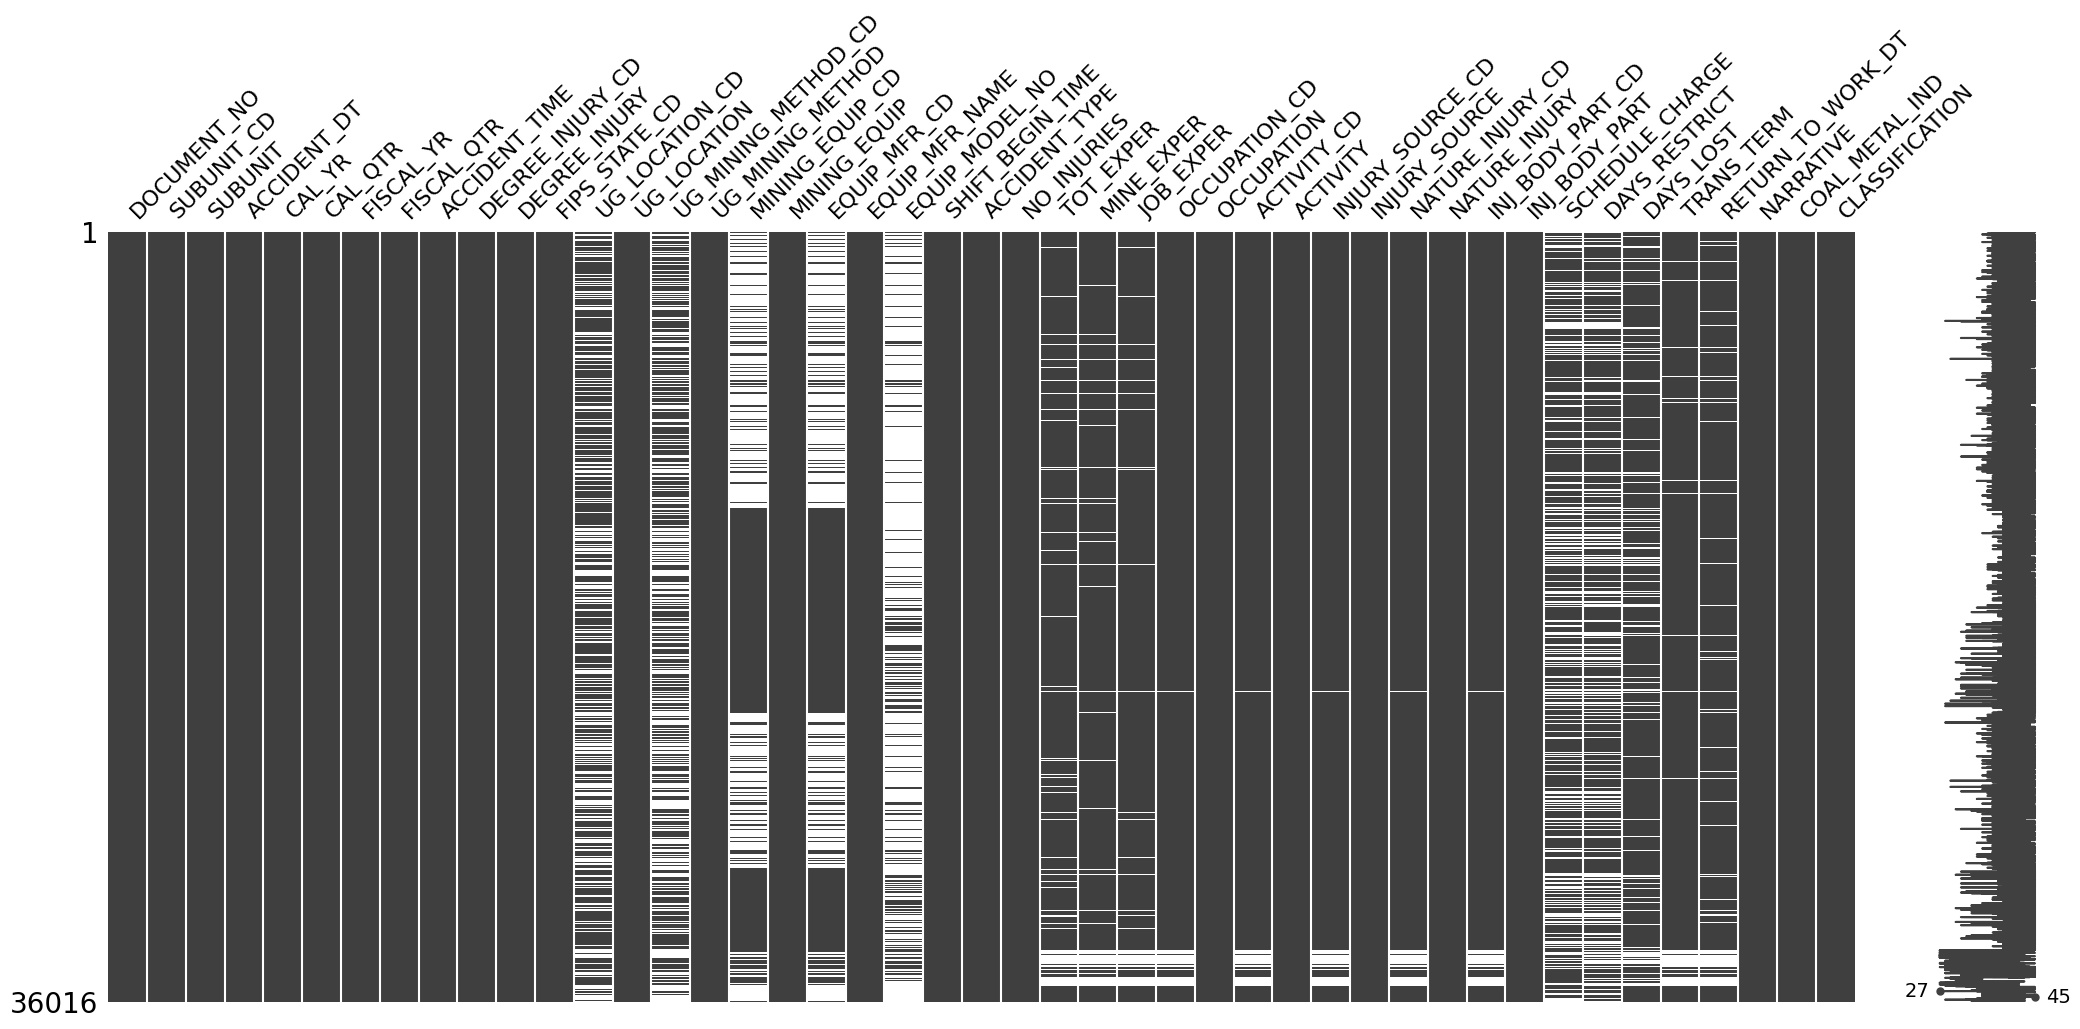

In [ ]:
msno.matrix(data)

In [ ]:
null_cols = []
nullcount = dict(data.isnull().sum())
for col in nullcount:
  if nullcount[col] != 0:
    null_cols.append(col)
    print(col)

DEGREE_INJURY_CD
UG_LOCATION_CD
UG_MINING_METHOD_CD
MINING_EQUIP_CD
EQUIP_MFR_CD
EQUIP_MODEL_NO
SHIFT_BEGIN_TIME
TOT_EXPER
MINE_EXPER
JOB_EXPER
OCCUPATION_CD
ACTIVITY_CD
INJURY_SOURCE_CD
NATURE_INJURY_CD
INJ_BODY_PART_CD
SCHEDULE_CHARGE
DAYS_RESTRICT
DAYS_LOST
TRANS_TERM
RETURN_TO_WORK_DT


In [ ]:
data['DEGREE_INJURY_CD'].fillna('15',inplace= True)
data['UG_LOCATION_CD'].fillna('99',inplace= True)
data['UG_MINING_METHOD_CD'].fillna('9',inplace= True)
data['MINING_EQUIP_CD'].fillna('0',inplace= True)
data['EQUIP_MFR_CD'].fillna('0',inplace= True)
data['EQUIP_MODEL_NO'].fillna('0',inplace= True)
data['TRANS_TERM'].fillna('U', inplace = True)
data['TOT_EXPER'].fillna(data['TOT_EXPER'].mean(), inplace=True)
data['MINE_EXPER'].fillna(data['MINE_EXPER'].mean(), inplace=True)
data['JOB_EXPER'].fillna(data['JOB_EXPER'].mean(), inplace=True)
data['SCHEDULE_CHARGE'].fillna(data['SCHEDULE_CHARGE'].mean(),inplace=True)
data['DAYS_RESTRICT'].fillna(data['DAYS_RESTRICT'].mean(),inplace=True)
data['DAYS_LOST'].fillna(data['DAYS_LOST'].mean(),inplace=True)
data['RETURN_TO_WORK_DT'].fillna(data['RETURN_TO_WORK_DT'].median(), inplace = True)
data.fillna('0',inplace = True)

<Axes: >

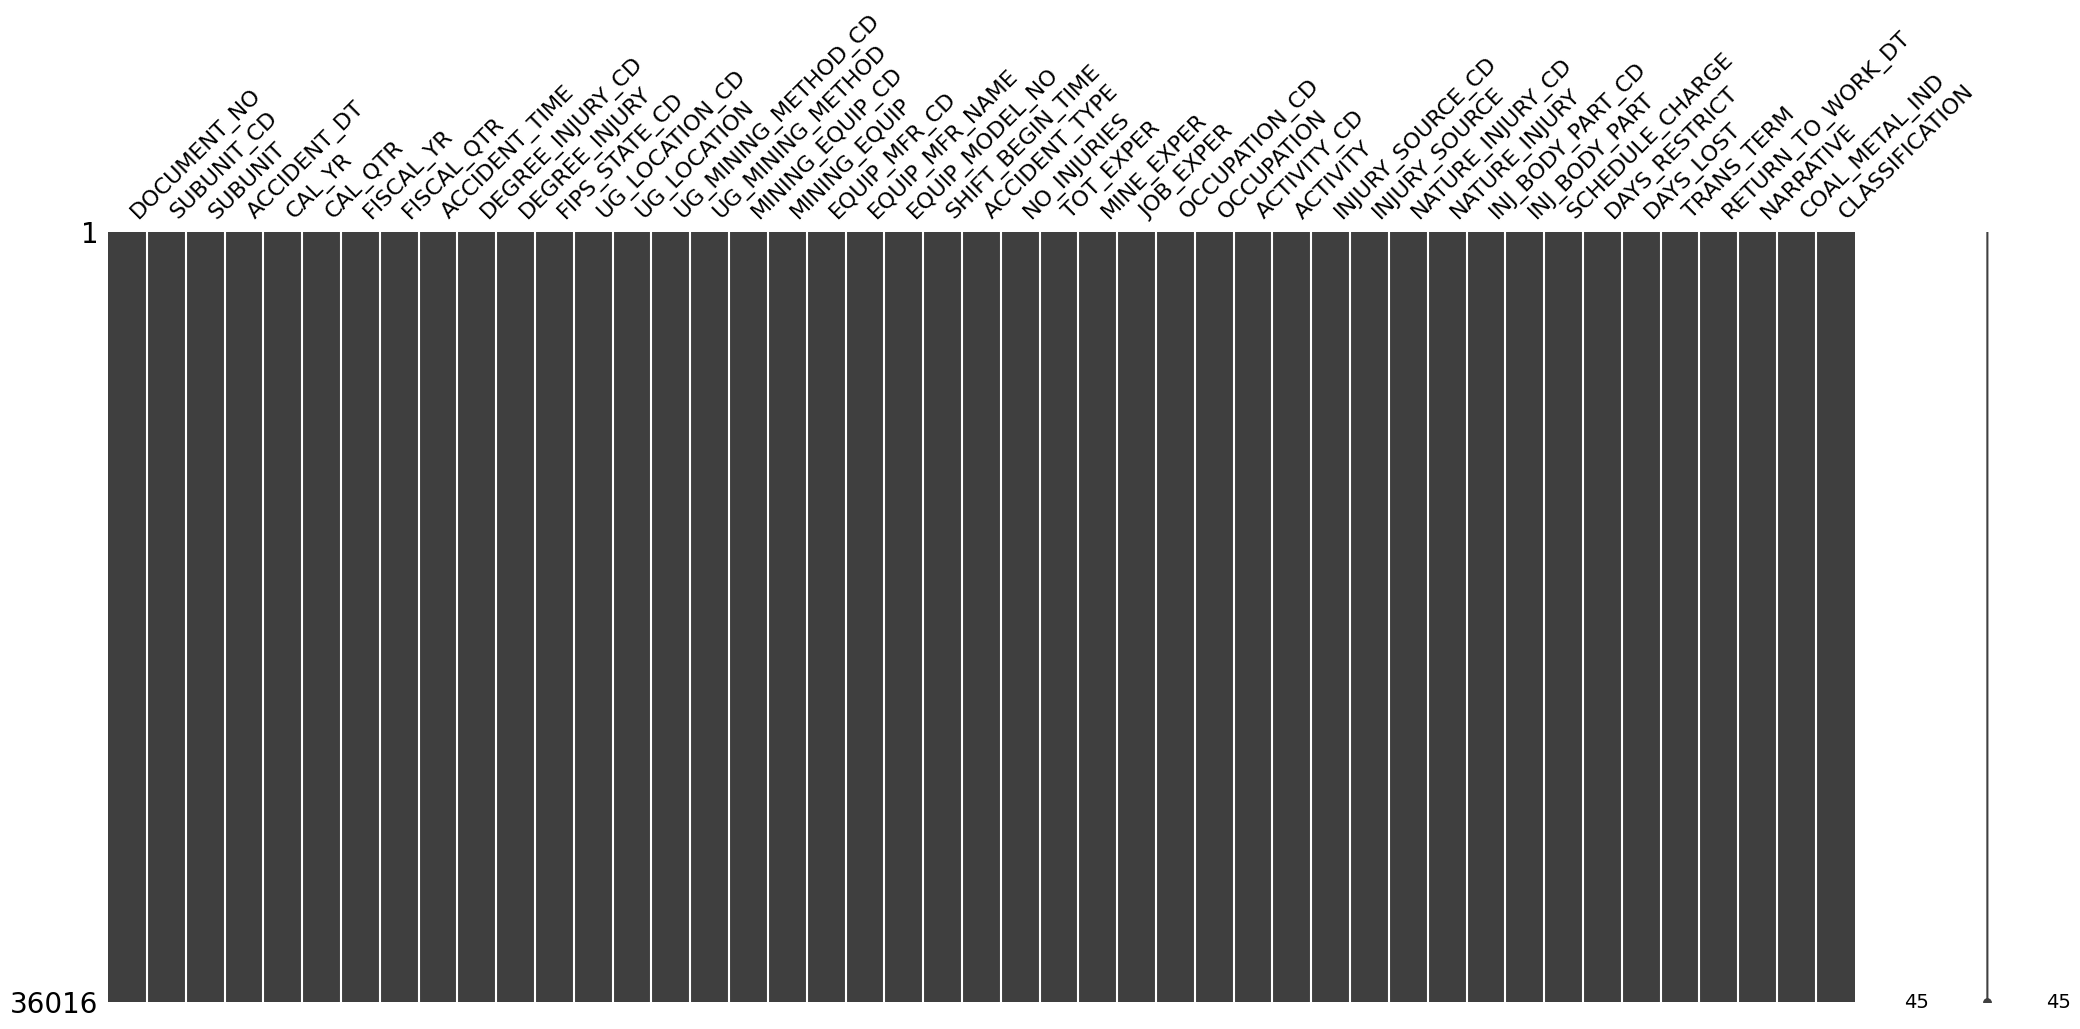

In [ ]:
msno.matrix(data)

In [ ]:
le = LabelEncoder()
catcols = list(data.select_dtypes(include=[object]).columns)
remove_cols = ['SUBUNIT','DEGREE_INJURY','UG_LOCATION','UG_MINING_METHOD','MINING_EQUIP','EQUIP_MFR_NAME','OCCUPATION','ACTIVITY','INJURY_SOURCE','NATURE_INJURY','INJ_BODY_PART','NARRATIVE','CLASSIFICATION']
for i in remove_cols:
  catcols.remove(i)
print(catcols)
for catcol in catcols:
  print(catcol)
  data[catcol] = le.fit_transform(data[catcol])

['SHIFT_BEGIN_TIME', 'ACCIDENT_TYPE', 'OCCUPATION_CD', 'ACTIVITY_CD', 'INJURY_SOURCE_CD', 'NATURE_INJURY_CD', 'INJ_BODY_PART_CD', 'TRANS_TERM', 'COAL_METAL_IND']
SHIFT_BEGIN_TIME


TypeError: ignored

#Hypothesis
1. Degree of injury vs Type of incident(y label)

> > Identifying degree level associated with type of injury so as to check if certain types of incidents are more fatal and need to be focused.

> > Prior Expectation: None


2. Days lost ( y label) vs type of incident
> > Identifying severity associated with each type of incident so as to check if a type of incident costs the operation more lost working days

> > Prior Expectation : None

3. Accident_Type vs No_injuries( y label)
> > Identifying the type of incidents that are most likely to cause more injuries (bar graph)
> > Prior Expectation : None

4. SUBUNIT_CD vs. DAYS_LOST ( y label)
> > Identifying the subunits where accidents are most likely to result in lost working days ( scatter plot)
> > Prior Expectation : Mining operation likely to cause more lose in working days

5. INJURY_SOURCE_CD vs. INJ_BODY_PART_CD
> > Identifying the areas of the body that are most at risk of injury in mining accidents (pie chart)

6. CAL_QTR vs. NO_INJURIES
> > will show the number of injuries over time that will help us identify the trends in number of mining incidents over quarters or time( line graph)  

7. COAL_METAL_IND vs. NO_INJURIES
> > will help us compare numbero of injuries in metal/non metal mines that will help us identify  which type of mine is more dangerous ( bar graph)

8. MINING_EQUIP_CD vs. DAYS_LOST.
> > Identifying the type of mining equipement that are most likely to cause an accident ( box plot)

9. NO_INJURIES vs. TOT_EXPER.
> > Identifying the  correlation between experience and the likelihood of being injured in a mining accident (scatter plot)

10. SHIFT_BEGIN_TIME vs. NO_INJURIES
> > Identifying  if there are certain times of day when accidents are more likely to occur (line graph )

11. SUBUNIT_CD vs. INJ_BODY_PART_CD
> >  identifying the subunits where accidents are most likely to result in injuries to specific body parts (heatmap)

12. UG_LOCATION_CD vs. DAYS_LOST
> >  identifying the underground locations where accidents are most likely to result in lost work days and injuries. (bubble chart)


In [ ]:
sns.barplot(data['DEGREE_INJURY_CD'], hue = data[])